In [1]:
# ============================================
# 1. Setup and Imports
# ============================================

# Importing essential libraries
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers, callbacks
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For visualization of filters and feature maps
from tensorflow.keras import backend as K

# Suppress TensorFlow warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

# Check TensorFlow version
print(f"TensorFlow Version: {tf.__version__}")


TensorFlow Version: 2.17.0


In [2]:
# ============================================
# 2. Loading and Exploring the Data
# ============================================

# Load CIFAR-10 Dataset
(x_train_c10, y_train_c10), (x_test_c10, y_test_c10) = tf.keras.datasets.cifar10.load_data()

# Load CIFAR-100 Dataset
(x_train_c100, y_train_c100), (x_test_c100, y_test_c100) = tf.keras.datasets.cifar100.load_data()

# Display dataset information
print("CIFAR-10:")
print(f"Training samples: {x_train_c10.shape[0]}")
print(f"Test samples: {x_test_c10.shape[0]}")
print(f"Image shape: {x_train_c10.shape[1:]}\n")

print("CIFAR-100:")
print(f"Training samples: {x_train_c100.shape[0]}")
print(f"Test samples: {x_test_c100.shape[0]}")
print(f"Image shape: {x_train_c100.shape[1:]}")


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 13s 0us/step
169001437/169001437 ━━━━━━━━━━━━━━━━━━━━ 13s 0us/step
CIFAR-10:
Training samples: 50000
Test samples: 10000
Image shape: (32, 32, 3)

CIFAR-100:
Training samples: 50000
Test samples: 10000
Image shape: (32, 32, 3)


In [3]:
# ============================================
# 3. Data Preprocessing and Augmentation
# ============================================

# Normalize pixel values to be between 0 and 1
x_train_c10 = x_train_c10.astype('float32') / 255.0
x_test_c10 = x_test_c10.astype('float32') / 255.0

x_train_c100 = x_train_c100.astype('float32') / 255.0
x_test_c100 = x_test_c100.astype('float32') / 255.0

# One-hot encode labels
y_train_c10 = to_categorical(y_train_c10, 10)
y_test_c10 = to_categorical(y_test_c10, 10)

y_train_c100 = to_categorical(y_train_c100, 100)
y_test_c100 = to_categorical(y_test_c100, 100)

# Define data augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    zoom_range=0.1
)

# Fit the generator to the training data
datagen.fit(x_train_c10)
datagen.fit(x_train_c100)


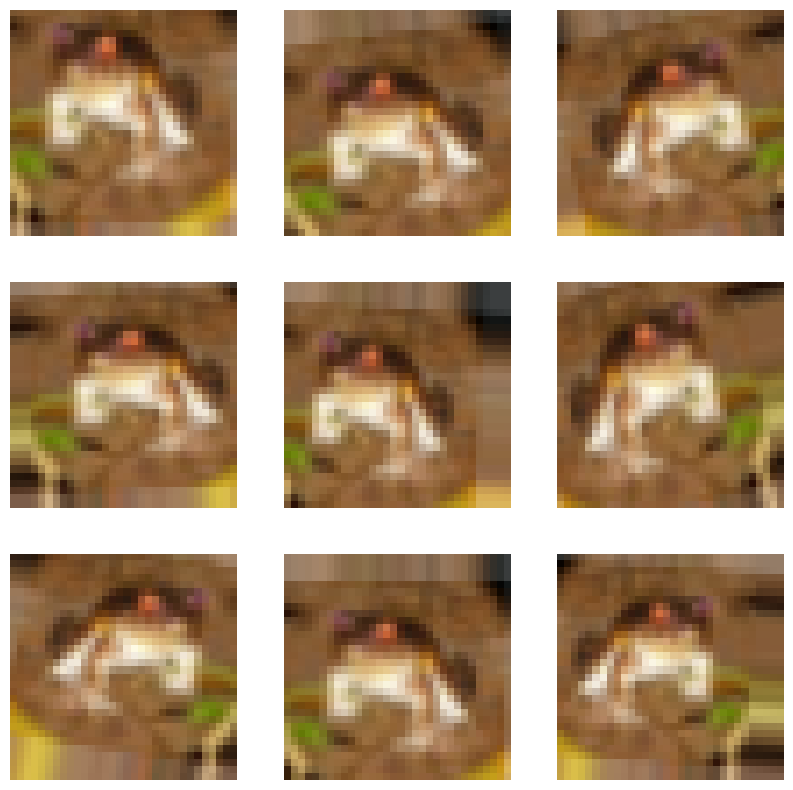

In [4]:
# Visualize some augmented images from CIFAR-10
import matplotlib.pyplot as plt

# Select a sample image from CIFAR-10
sample_image = x_train_c10[0]

# Reshape to add batch dimension
sample_image = np.expand_dims(sample_image, axis=0)

# Generate augmented images
aug_iter = datagen.flow(sample_image, batch_size=1)

# Plot augmented images
plt.figure(figsize=(10,10))
for i in range(9):
    aug_image = next(aug_iter)[0]
    plt.subplot(3,3,i+1)
    plt.imshow(aug_image)
    plt.axis('off')
plt.show()


In [5]:
# ============================================
# 4. Defining the CNN Model Architecture
# ============================================

def create_cnn_model(input_shape, num_classes):
    """
    Creates a Convolutional Neural Network model from scratch.

    Parameters:
    - input_shape: tuple, shape of the input images (height, width, channels)
    - num_classes: int, number of output classes

    Returns:
    - model: Keras Sequential model
    """
    model = models.Sequential()

    # First Convolutional Block
    model.add(layers.Conv2D(32, (3,3), padding='same', activation='relu', input_shape=input_shape))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(32, (3,3), padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D(pool_size=(2,2)))
    model.add(layers.Dropout(0.25))

    # Second Convolutional Block
    model.add(layers.Conv2D(64, (3,3), padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(64, (3,3), padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D(pool_size=(2,2)))
    model.add(layers.Dropout(0.25))

    # Third Convolutional Block
    model.add(layers.Conv2D(128, (3,3), padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(128, (3,3), padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D(pool_size=(2,2)))
    model.add(layers.Dropout(0.25))

    # Fully Connected Layers
    model.add(layers.Flatten())
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(num_classes, activation='softmax'))

    return model


In [6]:
# ============================================
# 5. Creating Models for CIFAR-10 and CIFAR-100
# ============================================

# Create CNN model for CIFAR-10
cnn_c10 = create_cnn_model(input_shape=x_train_c10.shape[1:], num_classes=10)
cnn_c10.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

# Create CNN model for CIFAR-100
cnn_c100 = create_cnn_model(input_shape=x_train_c100.shape[1:], num_classes=100)
cnn_c100.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

# Display model architectures
print("\nCNN Model for CIFAR-10:")
cnn_c10.summary()

print("\nCNN Model for CIFAR-100:")
cnn_c100.summary()



CNN Model for CIFAR-10:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 16, 16, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 8, 8, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 1,345,066 (5.13 MB)

 Trainable params: 1,343,146 (5.12 MB)

 Non-trainable params: 1,920 (7.50 KB)


CNN Model for CIFAR-100:


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 16, 16, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_10               │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_11               │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 8, 8, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_12               │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 1,391,236 (5.31 MB)

 Trainable params: 1,389,316 (5.30 MB)

 Non-trainable params: 1,920 (7.50 KB)

In [7]:
# ============================================
# 6. Training the Models (Corrected)
# ============================================

# Define training parameters
batch_size = 64
epochs = 50

# Define callbacks with updated file extensions
early_stop = callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
checkpoint_c10 = callbacks.ModelCheckpoint('best_cnn_c10.keras', monitor='val_loss', save_best_only=True)
checkpoint_c100 = callbacks.ModelCheckpoint('best_cnn_c100.keras', monitor='val_loss', save_best_only=True)

# Train CNN on CIFAR-10
history_cnn_c10 = cnn_c10.fit(
    datagen.flow(x_train_c10, y_train_c10, batch_size=batch_size),
    steps_per_epoch=x_train_c10.shape[0] // batch_size,
    epochs=epochs,
    validation_data=(x_test_c10, y_test_c10),
    callbacks=[early_stop, checkpoint_c10],
    verbose=1
)

# Train CNN on CIFAR-100
history_cnn_c100 = cnn_c100.fit(
    datagen.flow(x_train_c100, y_train_c100, batch_size=batch_size),
    steps_per_epoch=x_train_c100.shape[0] // batch_size,
    epochs=epochs,
    validation_data=(x_test_c100, y_test_c100),
    callbacks=[early_stop, checkpoint_c100],
    verbose=1
)


Epoch 1/50
781/781 ━━━━━━━━━━━━━━━━━━━━ 65s 62ms/step - accuracy: 0.3370 - loss: 2.1336 - val_accuracy: 0.5436 - val_loss: 1.3214
Epoch 2/50
781/781 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6406 - loss: 1.3144 - val_accuracy: 0.5466 - val_loss: 1.3069
Epoch 3/50
781/781 ━━━━━━━━━━━━━━━━━━━━ 77s 68ms/step - accuracy: 0.5526 - loss: 1.2593 - val_accuracy: 0.6283 - val_loss: 1.1256
Epoch 4/50
781/781 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5469 - loss: 1.0919 - val_accuracy: 0.6232 - val_loss: 1.1486
Epoch 5/50
781/781 ━━━━━━━━━━━━━━━━━━━━ 39s 50ms/step - accuracy: 0.6366 - loss: 1.0371 - val_accuracy: 0.6391 - val_loss: 1.0551
Epoch 6/50
781/781 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5938 - loss: 1.1866 - val_accuracy: 0.6571 - val_loss: 0.9986
Epoch 7/50
781/781 ━━━━━━━━━━━━━━━━━━━━ 39s 50ms/step - accuracy: 0.6737 - loss: 0.9261 - val_accuracy: 0.7059 - val_loss: 0.8614
Epoch 8/50
781/781 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6406 - loss: 0.8952 - val_accu

In [8]:
# ============================================
# 7. Evaluating the Models
# ============================================

# Evaluate CNN on CIFAR-10
test_loss_cnn_c10, test_acc_cnn_c10 = cnn_c10.evaluate(x_test_c10, y_test_c10, verbose=0)
print(f"\nCNN from Scratch - CIFAR-10 Test Accuracy: {test_acc_cnn_c10:.4f}")

# Evaluate CNN on CIFAR-100
test_loss_cnn_c100, test_acc_cnn_c100 = cnn_c100.evaluate(x_test_c100, y_test_c100, verbose=0)
print(f"CNN from Scratch - CIFAR-100 Test Accuracy: {test_acc_cnn_c100:.4f}")



CNN from Scratch - CIFAR-10 Test Accuracy: 0.8504
CNN from Scratch - CIFAR-100 Test Accuracy: 0.1991


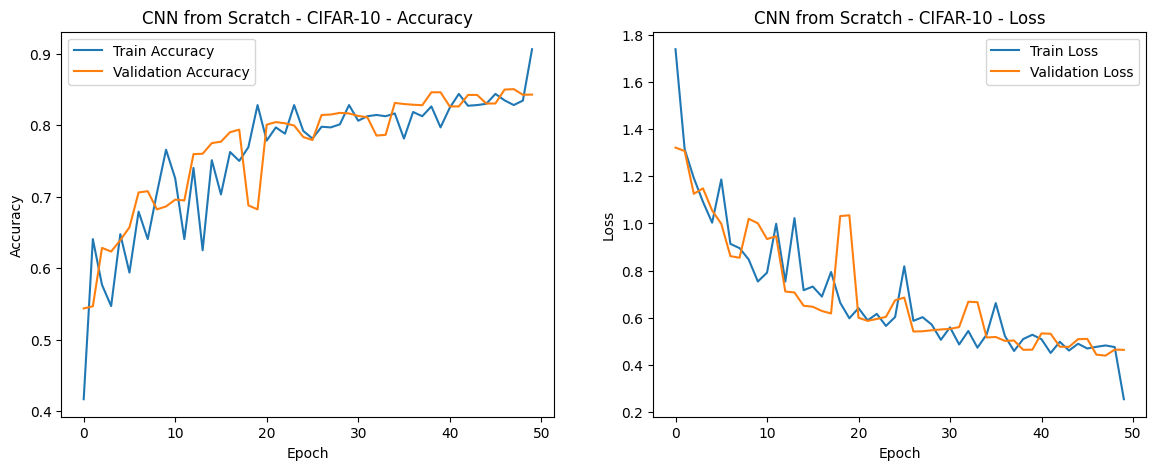

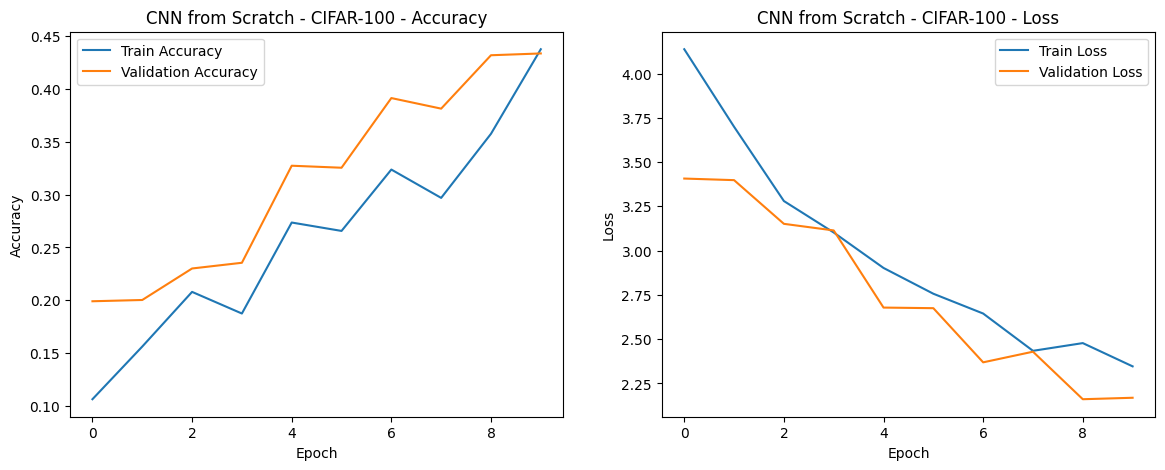

In [9]:
# ============================================
# 8. Visualizing Training History
# ============================================

def plot_history(history, title):
    """
    Plots the training and validation accuracy and loss.

    Parameters:
    - history: Keras History object
    - title: str, title for the plots
    """
    plt.figure(figsize=(14,5))

    # Accuracy Plot
    plt.subplot(1,2,1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{title} - Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss Plot
    plt.subplot(1,2,2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{title} - Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

# Plot for CNN on CIFAR-10
plot_history(history_cnn_c10, 'CNN from Scratch - CIFAR-10')

# Plot for CNN on CIFAR-100
plot_history(history_cnn_c100, 'CNN from Scratch - CIFAR-100')


In [13]:
# ============================================
# 11. Saving the Models
# ============================================

# Save the trained models
cnn_c10.save('/content/drive/MyDrive/saved Models/cnn_cifar10.h5')
cnn_c100.save('/content/drive/MyDrive/saved Models/cnn_cifar100.h5')

print("\nModels have been saved successfully.")



Models have been saved successfully.


Data visualization and testing model

In [15]:
# Importing essential libraries
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from google.colab import drive
from getpass import getpass


In [23]:
# Mount Google Drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [24]:
# Define the paths to your saved models
model_path_c10 = '/content/drive/MyDrive/saved Models/cnn_cifar10.h5'  # Update if different
model_path_c100 = '/content/drive/MyDrive/saved Models/cnn_cifar100.h5'  # Update if different


In [25]:
# Load the trained models
cnn_c10 = load_model(model_path_c10)
cnn_c100 = load_model(model_path_c100)

print("Models loaded successfully.")


Models loaded successfully.


In [26]:
# Load CIFAR-10 Dataset
(x_train_c10, y_train_c10), (x_test_c10, y_test_c10) = tf.keras.datasets.cifar10.load_data()

# Load CIFAR-100 Dataset
(x_train_c100, y_train_c100), (x_test_c100, y_test_c100) = tf.keras.datasets.cifar100.load_data()


In [27]:
# Display dataset shapes for CIFAR-10
print("CIFAR-10:")
print(f"Training samples: {x_train_c10.shape[0]}")
print(f"Test samples: {x_test_c10.shape[0]}")
print(f"Image shape: {x_train_c10.shape[1:]}\n")

# Display dataset shapes for CIFAR-100
print("CIFAR-100:")
print(f"Training samples: {x_train_c100.shape[0]}")
print(f"Test samples: {x_test_c100.shape[0]}")
print(f"Image shape: {x_train_c100.shape[1:]}")


CIFAR-10:
Training samples: 50000
Test samples: 10000
Image shape: (32, 32, 3)

CIFAR-100:
Training samples: 50000
Test samples: 10000
Image shape: (32, 32, 3)


In [28]:
# Normalize pixel values to be between 0 and 1
x_test_c10 = x_test_c10.astype('float32') / 255.0
x_test_c100 = x_test_c100.astype('float32') / 255.0

# One-hot encode labels
y_test_c10 = to_categorical(y_test_c10, 10)
y_test_c100 = to_categorical(y_test_c100, 100)


In [29]:
# CIFAR-10 class names
cifar10_classes = ['Airplane','Automobile','Bird','Cat','Deer',
                  'Dog','Frog','Horse','Ship','Truck']

# CIFAR-100 class names
# Keras provides fine labels for CIFAR-100
cifar100_fine_labels = [
    'apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle',
    'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel',
    'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock',
    'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur',
    'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster',
    'house', 'kangaroo', 'computer_keyboard', 'lamp', 'lawn_mower', 'leopard',
    'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain',
    'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree',
    'pear', 'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy',
    'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket',
    'rose', 'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail',
    'snake', 'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper',
    'table', 'tank', 'telephone', 'television', 'tiger', 'tractor', 'train',
    'trout', 'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf',
    'woman', 'worm'
]


In [30]:
# Evaluate CNN on CIFAR-10
test_loss_c10, test_acc_c10 = cnn_c10.evaluate(x_test_c10, y_test_c10, verbose=0)
print(f"\nCNN from Scratch - CIFAR-10 Test Accuracy: {test_acc_c10:.4f}")



CNN from Scratch - CIFAR-10 Test Accuracy: 0.8504


In [31]:
# Evaluate CNN on CIFAR-100
test_loss_c100, test_acc_c100 = cnn_c100.evaluate(x_test_c100, y_test_c100, verbose=0)
print(f"CNN from Scratch - CIFAR-100 Test Accuracy: {test_acc_c100:.4f}")


CNN from Scratch - CIFAR-100 Test Accuracy: 0.1991


In [32]:
# Select a random image from CIFAR-10 test set
import random
idx = random.randint(0, x_test_c10.shape[0]-1)
img = x_test_c10[idx]
true_label = cifar10_classes[np.argmax(y_test_c10[idx])]


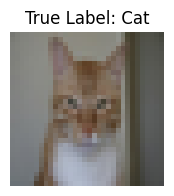

In [33]:
# Display the selected image
plt.figure(figsize=(2,2))
plt.imshow(img)
plt.title(f"True Label: {true_label}")
plt.axis('off')
plt.show()


In [34]:
# Expand dimensions to match model's input shape
img_array = np.expand_dims(img, axis=0)  # Shape: (1, 32, 32, 3)

# Make prediction
predictions = cnn_c10.predict(img_array)
predicted_class = cifar10_classes[np.argmax(predictions)]

print(f"Predicted Class: {predicted_class}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Predicted Class: Cat


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


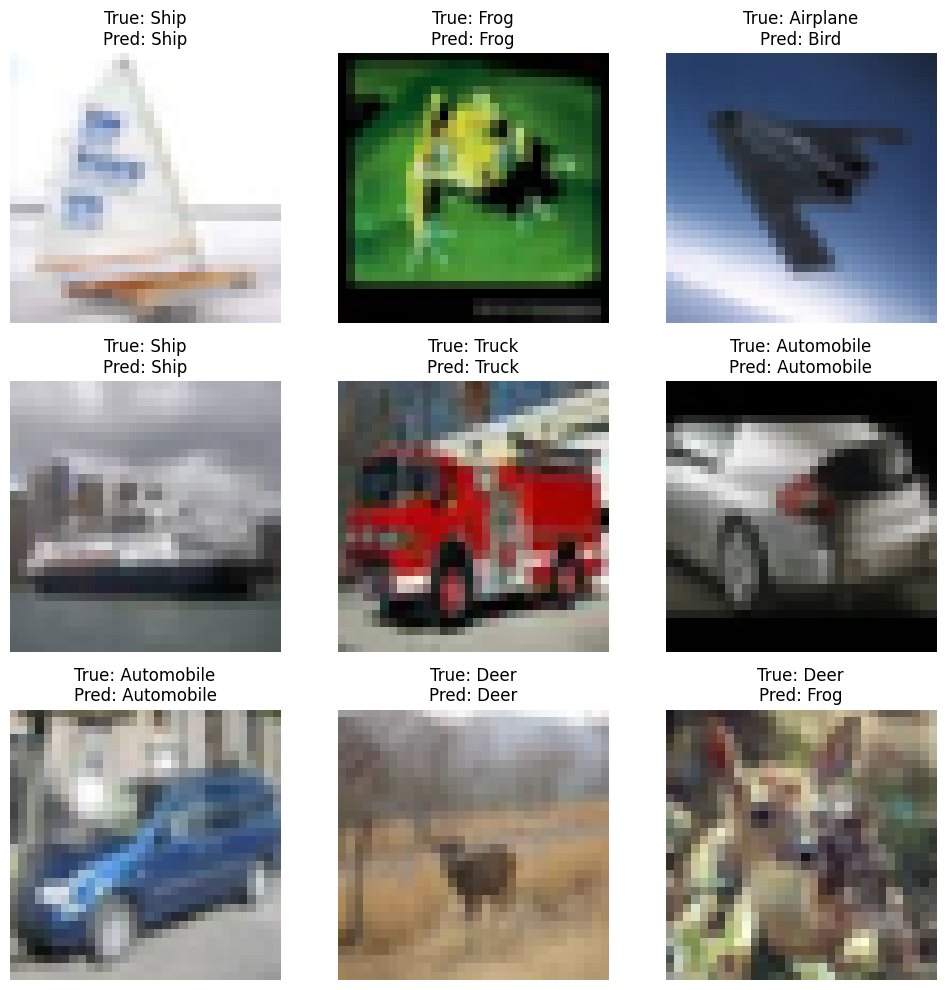

In [35]:
# Number of images to predict
num_images = 9

plt.figure(figsize=(10,10))
for i in range(num_images):
    idx = random.randint(0, x_test_c10.shape[0]-1)
    img = x_test_c10[idx]
    true_label = cifar10_classes[np.argmax(y_test_c10[idx])]

    # Display the image
    plt.subplot(3,3,i+1)
    plt.imshow(img)
    plt.title(f"True: {true_label}\nPred: {cifar10_classes[np.argmax(cnn_c10.predict(np.expand_dims(img, axis=0)))]}")
    plt.axis('off')
plt.tight_layout()
plt.show()


In [36]:
from sklearn.metrics import classification_report

# Generate predictions for the entire CIFAR-10 test set
y_pred_c10 = cnn_c10.predict(x_test_c10)
y_pred_classes_c10 = np.argmax(y_pred_c10, axis=1)
y_true_c10 = np.argmax(y_test_c10, axis=1)

# Classification Report
print("Classification Report - CIFAR-10")
print(classification_report(y_true_c10, y_pred_classes_c10, target_names=cifar10_classes))


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Classification Report - CIFAR-10
              precision    recall  f1-score   support

    Airplane       0.87      0.83      0.85      1000
  Automobile       0.97      0.90      0.93      1000
        Bird       0.86      0.73      0.79      1000
         Cat       0.83      0.62      0.71      1000
        Deer       0.87      0.83      0.85      1000
         Dog       0.76      0.84      0.80      1000
        Frog       0.84      0.94      0.88      1000
       Horse       0.86      0.92      0.89      1000
        Ship       0.91      0.91      0.91      1000
       Truck       0.77      0.98      0.86      1000

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



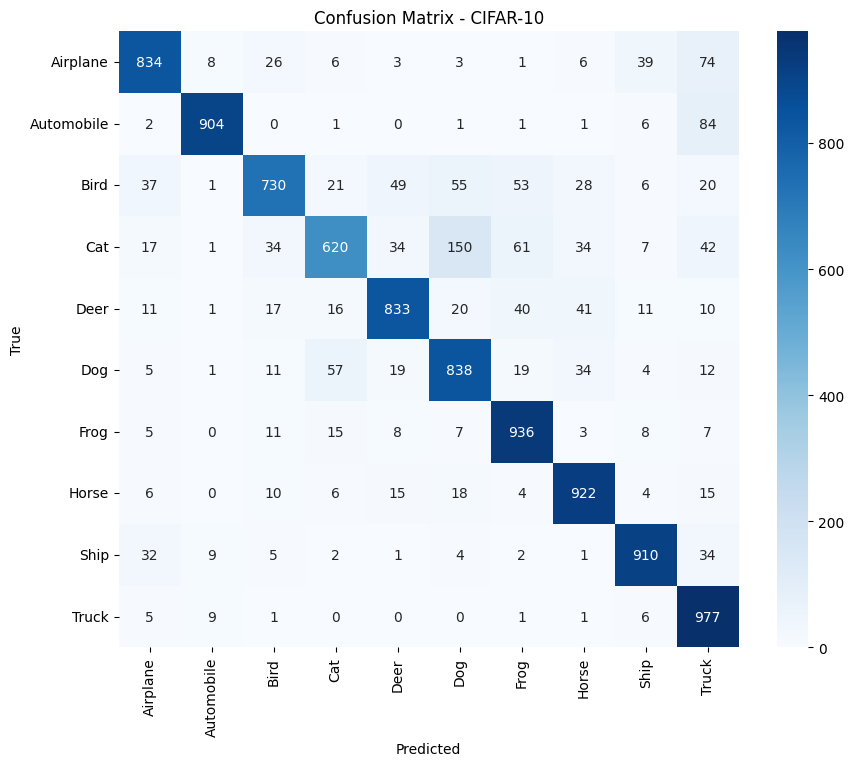

In [37]:


from sklearn.metrics import confusion_matrix

# Generate confusion matrix
conf_matrix_c10 = confusion_matrix(y_true_c10, y_pred_classes_c10)

# Plot the confusion matrix
plt.figure(figsize=(10,8))
sns.heatmap(conf_matrix_c10, annot=True, fmt='d', cmap='Blues',
            xticklabels=cifar10_classes,
            yticklabels=cifar10_classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - CIFAR-10')
plt.show()


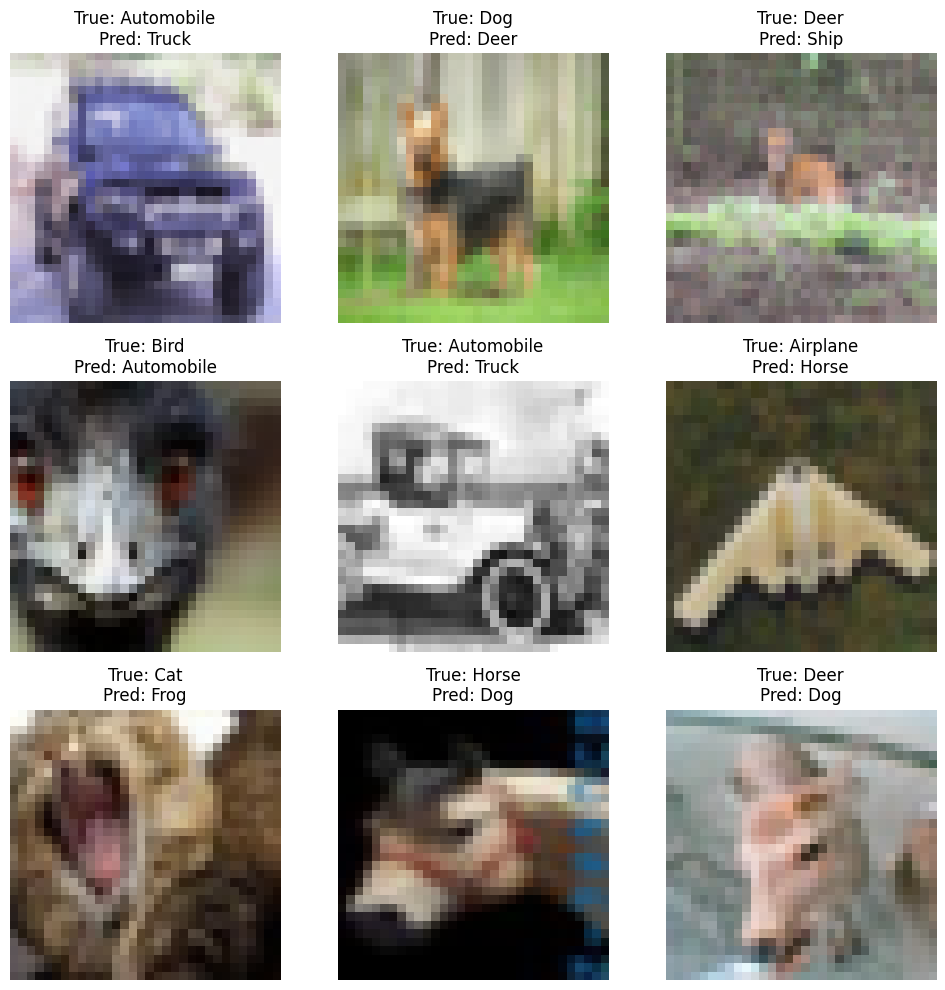

In [38]:
# Find indices of misclassified images
misclassified_indices = np.where(y_pred_classes_c10 != y_true_c10)[0]

# Number of misclassified images to display
num_misclassified = 9

plt.figure(figsize=(10,10))
for i, idx in enumerate(misclassified_indices[:num_misclassified]):
    img = x_test_c10[idx]
    true_label = cifar10_classes[y_true_c10[idx]]
    predicted_label = cifar10_classes[y_pred_classes_c10[idx]]

    plt.subplot(3,3,i+1)
    plt.imshow(img)
    plt.title(f"True: {true_label}\nPred: {predicted_label}")
    plt.axis('off')
plt.tight_layout()
plt.show()
